In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd, numpy as np

In [38]:
url = "https://vincentarelbundock.github.io/Rdatasets/csv/carData/CES11.csv"
CES11_df = pd.read_csv(url)

In [44]:
print(CES11_df.describe)
print(CES11_df.size)
print(CES11_df.dtypes)

<bound method NDFrame.describe of      province  population   weight  gender abortion importance  education  \
0          BC     3267345  4287.85  Female       No   somewhat     somePS   
1          QC     5996930  9230.78    Male       No        not  bachelors   
2          QC     5996930  6153.85    Male      Yes   somewhat    college   
3          NL      406455  3430.00  Female       No       very     somePS   
4          ON     9439960  8977.61    Male       No        not     higher   
...       ...         ...      ...     ...      ...        ...        ...   
2226       MB      871460  8743.75  Female       No   somewhat    college   
2227       QC     5996930  6153.85  Female       No   somewhat     somePS   
2228       QC     5996930  6153.85    Male       No   somewhat     higher   
2229       BC     3267345  4287.85  Female       No        not     higher   
2230       MB      871460  5829.16    Male       No        not         HS   

      urban  
0     urban  
1     urban  

Drop the unnamed category, this is going to create an issue later. We are also going to drop the id column, since this
column isn't going to give us any additional information and might confuse whatever model we use in the future.
Since most of the categories are categorical we will convert these to a integer representation, to make using in machine learning models easier.

In [40]:
CES11_df.drop('Unnamed: 0', axis=1, inplace=True)
CES11_df.drop('id', axis=1, inplace=True)

In [41]:
CES11_df_2 = CES11_df.replace({'province' :{'AB':0,'BC':1,'MB':2,'NB':3,'NL':4,'NS':5,'ON':6,'PE':7,'QC':8,'SK':9},
                             'gender':{'Male':0, 'Female':1},
                             'importance' : {'not':0,'somewhat':1,'very':2},
                             'education' : {'bachelors':0,'college':1, 'higher':2, 'HS' :3, 'lessHS':4,'somePS':5},
                             'urban' : {'urban' : 0,'rural' :1}})
CES11_df.describe

<bound method NDFrame.describe of      province  population   weight  gender abortion importance  education  \
0          BC     3267345  4287.85  Female       No   somewhat     somePS   
1          QC     5996930  9230.78    Male       No        not  bachelors   
2          QC     5996930  6153.85    Male      Yes   somewhat    college   
3          NL      406455  3430.00  Female       No       very     somePS   
4          ON     9439960  8977.61    Male       No        not     higher   
...       ...         ...      ...     ...      ...        ...        ...   
2226       MB      871460  8743.75  Female       No   somewhat    college   
2227       QC     5996930  6153.85  Female       No   somewhat     somePS   
2228       QC     5996930  6153.85    Male       No   somewhat     higher   
2229       BC     3267345  4287.85  Female       No        not     higher   
2230       MB      871460  5829.16    Male       No        not         HS   

      urban  
0     urban  
1     urban  

Let's Visualize our data. The plan is to make a model to predict whether a Canadian voter supports or opposes
banning abortion, so that will be our hue.

<AxesSubplot:>

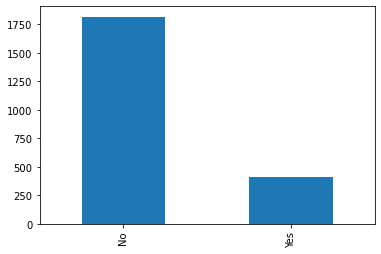

In [42]:
CES11_df_2['abortion'].value_counts().plot(kind='bar')

This is a hugely imbalanced dataset, no's makeup about 80% of the dataset. This means it is going to be a little more
difficult to make a machine learning model better than simply pure guessing. Let's go a step further and look at the
pair plot

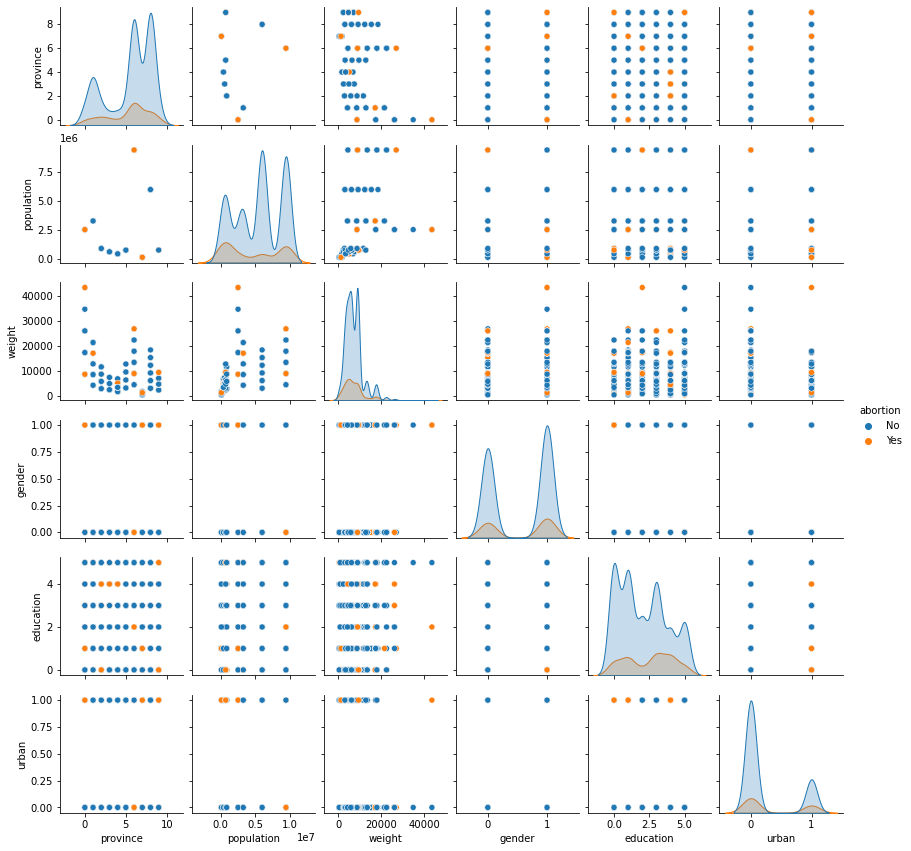

In [43]:
sns.pairplot(CES11_df_2, hue='abortion', height=2)

In addition to the imbalance of the abortion column, there are not a lot of clear places we could draw a clear dividing
line without potentially over fitting our data

After looking at the summary statistics for the dataset I have a couple questions I think we could potentially answer.
The first is whether a particular characteristic is valuable for predicting a person's stance on banning abortion.
To solve this question I think a decision tree would be the best model to use, because we can very clearly see the
columns the model is using. The second question I would like to answer is whether attitudes on abortion can predict,
other characteristics, like where someone is from, or their education. To solve this question we will use an SVM, because
they offer more flexibility than decision trees. I expect that I will be able to predict whether someone supports banning abortion or not,
but will struggle with predicting the other characteristics.